# 서울시 연간 기온변화 분석 및 시각화
기상자료개방포털에서 데이터를 수집하여 전처리하고, 서울시 연간 기온 변화를 분석하고 시각화 할 수 있다.

## 1. 전국 기온데이터 수집
* 기상자료개방포털
    https://data.kma.go.kr/cmmn/main.do

* 기상자료개방포털>데이터>기상관측>지상>종관기상관측

    [자료형태] 일자료

    [지점] 전체

    [자료] 기온>최저,최고,평균

    [기간] 1911~2010(10년단위로 나눠 다운로드)


## 2. 전국 기온 데이터 확인
* 데이터프레임 생성하고 데이터 살펴보기

In [50]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus']= False

### 2.1. 데이터프레임 생성
* 데이터 파일(csv)를 data폴더에 업로드한다.
* pd.read_csv(파일경로,endcoding='cp949')

In [52]:
# 파일 경로 저장하기
file_list = os.listdir('./drive/MyDrive/Colab Notebooks/알파코 파이썬 데이터 시각화 입문/ASOS Data')
file_list

['1911-1920 일별 기온.csv',
 '1921-1930 일별 기온.csv',
 '1931-1940 일별 기온.csv',
 '1941-1950 일별 기온.csv',
 '1951-1960 일별 기온.csv',
 '1961-1970 일별 기온.csv',
 '1971-1980 일별 기온.csv',
 '1981-1990 일별 기온.csv',
 '1991-2000 일별 기온.csv',
 '2001-2010 일별 기온.csv',
 '2011-2020 일별 기온.csv']

In [53]:
data_scr = './drive/MyDrive/Colab Notebooks/알파코 파이썬 데이터 시각화 입문/ASOS Data/'
data_scr

'./drive/MyDrive/Colab Notebooks/알파코 파이썬 데이터 시각화 입문/ASOS Data/'

In [54]:
# 파일 하나씩 저장하기

for i in file_list:
    file_src = data_scr+i
    globals()["df_"+ i.split('-')[0]] = pd.read_csv(file_src, encoding='cp949')

In [55]:
# 데이터 확인
df_2011.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,90,속초,2011-01-01,-0.3,-5.0,1.7
1,90,속초,2011-01-02,0.9,-2.3,6.1
2,90,속초,2011-01-03,-0.6,-4.3,3.8
3,90,속초,2011-01-04,0.2,-4.3,6.3
4,90,속초,2011-01-05,-0.6,-3.5,3.8


### 2.2. 데이터프레임 연결하기
* pd.concat(데이터프레임리스트, axis=0) : 행 방향으로 연결(default) - 세로로 길게
* pd.concat(데이터프레임리스트, axis=1) : 열 방향으로 연결 - 가로로
* ingnore_index=True : 인덱스 재지정

In [56]:
# 데이터 가져와서 합치기
df = pd.DataFrame()
for i in file_list:
    file_src = data_scr+i
    data = pd.read_csv(file_src, encoding='cp949')
    df = pd.concat([df,data])
df
# 인덱스가 중복된채로 들어가 있음

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,105,강릉,1911-10-04,NaN,12.2,26.2
1,105,강릉,1911-10-09,NaN,6.0,16.6
2,105,강릉,1911-10-16,NaN,9.2,15.5
3,105,강릉,1911-11-01,NaN,6.0,14.8
4,105,강릉,1911-11-04,NaN,10.2,19.5
...,...,...,...,...,...,...
342985,295,남해,2020-12-27,4.4,2.5,6.0
342986,295,남해,2020-12-28,4.7,1.1,11.5
342987,295,남해,2020-12-29,5.4,1.0,11.2
342988,295,남해,2020-12-30,-3.0,-5.4,1.6


In [57]:
df.loc[0]

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,105,강릉,1911-10-04,NaN,12.2,26.2
0,105,강릉,1921-01-01,4.9,0.2,7.7
0,105,강릉,1931-01-01,-0.2,-2.8,2.5
0,105,강릉,1941-01-01,3.0,-1.9,9.3
0,105,강릉,1951-09-01,24.6,19.1,29.8
0,90,속초,1968-01-01,-1.4,-4.8,2.5
0,90,속초,1971-01-01,2.4,-1.0,5.6
0,90,속초,1981-01-01,-0.9,-2.8,1.4
0,90,속초,1991-01-01,4.0,0.1,8.5
0,90,속초,2001-01-01,-1.6,-6.1,2.1


In [58]:
# 인덱스 다시 정해주기
df= df.reset_index(drop = True)
df

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,105,강릉,1911-10-04,NaN,12.2,26.2
1,105,강릉,1911-10-09,NaN,6.0,16.6
2,105,강릉,1911-10-16,NaN,9.2,15.5
3,105,강릉,1911-11-01,NaN,6.0,14.8
4,105,강릉,1911-11-04,NaN,10.2,19.5
...,...,...,...,...,...,...
1597071,295,남해,2020-12-27,4.4,2.5,6.0
1597072,295,남해,2020-12-28,4.7,1.1,11.5
1597073,295,남해,2020-12-29,5.4,1.0,11.2
1597074,295,남해,2020-12-30,-3.0,-5.4,1.6


### 2.3. 데이터타입 확인/변경

#### 2.3.1. 데이터타입 확인
* 데이터프레임.dtypes

In [59]:
df.dtypes

지점            int64
지점명          object
일시           object
평균기온(°C)    float64
최저기온(°C)    float64
최고기온(°C)    float64
dtype: object

2.3.2. 데이터타입 변경
* 일시의 데이터타입을 문자열에서 데이트타임으로

    pd.to_datetime(컬럼)

In [60]:
df['일시'] = pd.to_datetime(df['일시'])
df['일시']

0         1911-10-04
1         1911-10-09
2         1911-10-16
3         1911-11-01
4         1911-11-04
             ...    
1597071   2020-12-27
1597072   2020-12-28
1597073   2020-12-29
1597074   2020-12-30
1597075   2020-12-31
Name: 일시, Length: 1597076, dtype: datetime64[ns]

### 2.4. 데이터 크기 확인
* 데이터프레임.shape

In [61]:
df.shape

(1597076, 6)

### 2.5. 데이터 정보 확인
* 데이터프레임.info()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597076 entries, 0 to 1597075
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   지점        1597076 non-null  int64         
 1   지점명       1597076 non-null  object        
 2   일시        1597076 non-null  datetime64[ns]
 3   평균기온(°C)  1594864 non-null  float64       
 4   최저기온(°C)  1596878 non-null  float64       
 5   최고기온(°C)  1596907 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 73.1+ MB


### 2.6. 데이터 내용 확인

#### 2.6.1. 지점명, 지점명의 개수 확인
* 컬럼.unique() : 컬럼의 중복을 배제한 값 목록
* 컬럼.nunique() : 컬럼의 중복을 배제한 값 목록 개수

In [63]:
# 지점명 확인
df['지점명'].unique()

array(['강릉', '서울', '인천', '대구', '전주', '부산', '목포', '제주', '울릉도', '추풍령', '광주',
       '포항', '울산', '여수', '속초', '춘천', '수원', '서산', '청주', '대전', '군산', '통영',
       '서귀포', '진주', '임실', '정읍', '대관령', '원주', '충주', '울진', '안동', '완도', '성산',
       '강화', '양평', '이천', '인제', '홍천', '삼척', '제천', '보은', '천안', '보령', '부여',
       '금산', '부안', '남원', '고창군', '주암', '장흥', '해남', '고흥', '성산포', '영주', '문경',
       '영덕', '의성', '구미', '영천', '거창', '합천', '밀양', '산청', '거제', '남해', '철원',
       '관악산', '창원', '고산', '태백', '장수', '봉화', '동두천', '백령도', '동해', '영월',
       '무안', '흑산도', '파주', '북강릉', '상주', '고창', '진도(첨찰산)', '정선군', '영광군',
       '김해시', '순창군', '북창원', '양산시', '보성군', '강진군', '의령군', '함양군', '청송군',
       '경주시', '북춘천', '순천', '대구(기)', '홍성', '세종', '광양시', '진도군'],
      dtype=object)

In [64]:
# 지점명 개수 확인
df['지점명'].nunique()

102

#### 2.6.2. 연도의 개수 확인
* datetime에서 연도,월,일 가져오기

    컬럼.dt.year, 컬럼.dt.month, 컬럼.dt.day

In [65]:
df['일시'].dt.year

0          1911
1          1911
2          1911
3          1911
4          1911
           ... 
1597071    2020
1597072    2020
1597073    2020
1597074    2020
1597075    2020
Name: 일시, Length: 1597076, dtype: int64

In [66]:
# 110년간의 데이터
df['일시'].dt.year.nunique()

110

#### 2.6.3. 연도별 데이터 개수 확인

In [67]:
df['일시'].dt.year.value_counts()
# 과거엔 데이터가 별로 없다.

2020    34767
2019    34738
2018    34673
2017    34668
2016    34496
        ...  
1917     2190
1915     2190
1914     2190
1913     2190
1911     1836
Name: 일시, Length: 110, dtype: int64

#### 2.6.4. 지점별 데이터 개수 확인

In [68]:
# 지점명 별로 데이터 개수가 몇 개인지 세어라.
df['지점명'].value_counts()

대구       40178
부산       40178
목포       40178
인천       39690
강릉       39509
         ...  
진도군       2423
홍성        1885
북춘천       1553
대구(기)      619
세종         581
Name: 지점명, Length: 102, dtype: int64

## 3. 서울시 기온 데이터 추출 및 확인

### 3.1. 서울시 데이터만 추출하여 서브셋 생성
* 조건으로 데이터를 추출하여 서브셋을 만들 때, copy본으로 만드는 것을 권장 -> df.copy()

In [69]:
df_seoul = df[df['지점명']=='서울'].copy()
df_seoul

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
3299,108,서울,1911-01-01,-10.1,-14.2,-6.5
3300,108,서울,1911-01-02,-12.5,-19.7,-5.9
3301,108,서울,1911-01-03,-4.3,-10.2,-1.4
3302,108,서울,1911-01-04,0.8,-2.6,2.2
3303,108,서울,1911-01-05,-3.9,-8.7,1.7
...,...,...,...,...,...,...
1295817,108,서울,2020-12-27,5.8,1.4,10.0
1295818,108,서울,2020-12-28,6.7,4.2,11.4
1295819,108,서울,2020-12-29,0.1,-6.2,4.3
1295820,108,서울,2020-12-30,-10.9,-12.9,-6.2


### 3.2. 결측치 분석
* 데이터프레임.isnull().sum()

In [70]:
# 결측치 확인
df_seoul.isnull().sum()

지점          0
지점명         0
일시          0
평균기온(°C)    0
최저기온(°C)    2
최고기온(°C)    3
dtype: int64

In [71]:
# 결측치가 있는 데이터 보기
df_seoul[ (df_seoul['최저기온(°C)'].isnull()) | 
         (df_seoul['최고기온(°C)'].isnull()) ]

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
181291,108,서울,1967-02-19,-1.7,NaN,NaN
254319,108,서울,1973-10-16,12.3,NaN,NaN
1294645,108,서울,2017-10-12,11.4,8.8,NaN


### 3.3. 결측치 제거
* 데이터프레임.dropna() : 결측치가 포함된 행을 모두 제거

In [72]:
df_seoul = df_seoul.dropna()
# 아니면 df_seoul.dropna(inplace=True)
df_seoul

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
3299,108,서울,1911-01-01,-10.1,-14.2,-6.5
3300,108,서울,1911-01-02,-12.5,-19.7,-5.9
3301,108,서울,1911-01-03,-4.3,-10.2,-1.4
3302,108,서울,1911-01-04,0.8,-2.6,2.2
3303,108,서울,1911-01-05,-3.9,-8.7,1.7
...,...,...,...,...,...,...
1295817,108,서울,2020-12-27,5.8,1.4,10.0
1295818,108,서울,2020-12-28,6.7,4.2,11.4
1295819,108,서울,2020-12-29,0.1,-6.2,4.3
1295820,108,서울,2020-12-30,-10.9,-12.9,-6.2


In [73]:
# 결측치 재확인
df_seoul.isnull().sum()

지점          0
지점명         0
일시          0
평균기온(°C)    0
최저기온(°C)    0
최고기온(°C)    0
dtype: int64

In [74]:
# 데이터프레임 크기
df_seoul.shape

(38988, 6)

### 3.4. 연도별 데이터 개수 확인

In [75]:
df_seoul['일시'].dt.year.value_counts()
# 전쟁시기엔 데이터가 적음
# length가 108 -> 우리는 1911~2020 총 110년간의 데이터를 가져왔다. 2년이 빈다.

2020    366
1964    366
1992    366
1988    366
1944    366
       ... 
2017    364
1973    364
1967    364
1950    243
1953     31
Name: 일시, Length: 108, dtype: int64

### 3.5. 시각화로 데이터 확인
* 최저기온
* 최고기온
* 평균기온

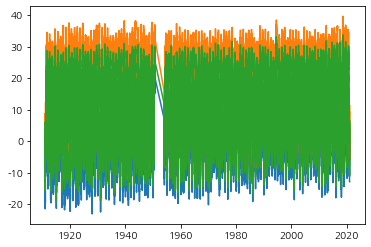

In [76]:
plt.plot(df_seoul['일시'],df_seoul['최저기온(°C)'])
plt.plot(df_seoul['일시'],df_seoul['최고기온(°C)'])
plt.plot(df_seoul['일시'],df_seoul['평균기온(°C)'])
plt.show()
# 모두 중간이 비어있음 -> 1951 1952년에는 전쟁중이라 데이터가 없다?

In [77]:
# 1951년 데이터추출
df_seoul[df_seoul['일시'].dt.year == 1951]
# 데이터 없음

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)


In [78]:
# 1952년 데이터추출
df_seoul[df_seoul['일시'].dt.year == 1952]
# 데이터 없음

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)


## 4. 서울시 연간 평균, 최저, 최고기온변화 시각화

### 4.1. 서울시 연간 평균기온 변화

#### 4.1.1. 연간 평균기온 추출
* 연간 일 평균기온의 평균

    연도로 그룹화하여 연도별 평균기온 산출

In [82]:
df_seoul_mean = df_seoul.groupby(df['일시'].dt.year)['평균기온(°C)'].mean()
df_seoul_mean
# 연간 기온이 상승하는듯 보인다.

일시
1911    10.654795
1912    10.123770
1913    10.086027
1914    12.029041
1915    10.898356
          ...    
2016    13.592896
2017    13.077747
2018    13.002466
2019    13.598904
2020    13.271858
Name: 평균기온(°C), Length: 108, dtype: float64

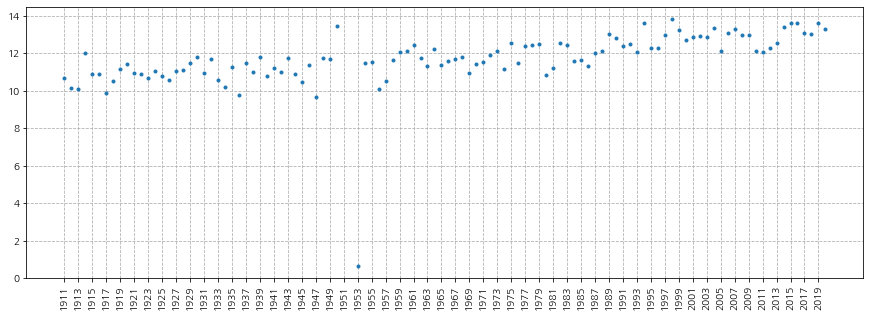

In [90]:
# 시각화하여 데이터 확인
plt.figure(figsize=(15,5))
plt.plot(df_seoul_mean,'.') # 선말고 점으로 보겠다.
plt.xticks(range(1911,2021,2), rotation=90)
plt.grid(ls='--')
plt.show()
# 이상치가 있어 보인다.

#### 4.1.2. 이상치 제거

In [92]:
df_seoul_mean.drop(index=[1950,1953], inplace=True)

In [93]:
df_seoul_mean
# length가 108에서 106으로 줄었다.

일시
1911    10.654795
1912    10.123770
1913    10.086027
1914    12.029041
1915    10.898356
          ...    
2016    13.592896
2017    13.077747
2018    13.002466
2019    13.598904
2020    13.271858
Name: 평균기온(°C), Length: 106, dtype: float64

#### 4.1.3. 시각화

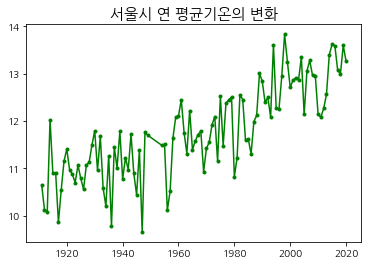

In [96]:
plt.plot(df_seoul_mean, 'g.-')
plt.title('서울시 연 평균기온의 변화',size=15)
plt.show()
# 상승하는 추세이다.

### 4.2. 서울시 연간 최저기온 변화

#### 4.2.1. 서울시 연간 최저기온 추출
* 연간 일 최저기온의 최저

    연도로 그룹핑하여 최저기온의 최소값 추출

In [100]:
df_seoul_min = df_seoul.groupby(df_seoul['일시'].dt.year)['최저기온(°C)'].min()
df_seoul_min
# 연간 최저기온도 상승하는듯 보인다.

일시
1911   -21.5
1912   -18.6
1913   -19.6
1914   -14.0
1915   -21.3
        ... 
2016   -18.0
2017   -12.6
2018   -17.8
2019   -10.9
2020   -12.9
Name: 최저기온(°C), Length: 108, dtype: float64

#### 4.2.2. 시각화

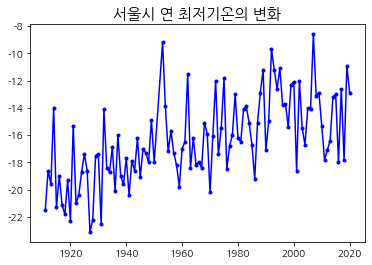

In [101]:
plt.plot(df_seoul_min,'b.-')
plt.title('서울시 연 최저기온의 변화', size= 15)
plt.show()

### 4.3. 서울시 연간 최고기온 변화

#### 4.3.1. 서울시 연간 최고기온 추출
* 연간 일 최고기온의 최고

    연도로 그룹핑하여 최고기온의 최대값 추출

In [102]:
df_seoul_max = df_seoul.groupby(df_seoul['일시'].dt.year)['최고기온(°C)'].max()
df_seoul_max
# 연간 최고기온은 큰 상승 없어보인다.

일시
1911    34.5
1912    34.0
1913    31.7
1914    35.6
1915    34.8
        ... 
2016    36.6
2017    35.4
2018    39.6
2019    36.8
2020    35.4
Name: 최고기온(°C), Length: 108, dtype: float64

#### 4.3.2. 1950, 1953년 데이터 제거

In [103]:
df_seoul_max.drop(index=[1950,1953],inplace=True)

In [105]:
df_seoul_max

일시
1911    34.5
1912    34.0
1913    31.7
1914    35.6
1915    34.8
        ... 
2016    36.6
2017    35.4
2018    39.6
2019    36.8
2020    35.4
Name: 최고기온(°C), Length: 106, dtype: float64

#### 4.3.2. 시각화

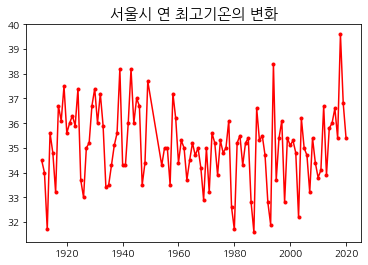

In [104]:
plt.plot(df_seoul_max,'r.-')
plt.title('서울시 연 최고기온의 변화', size= 15)
plt.show()
# 상승추세는 아니지만 최근에는 상승하는듯 보인다.

## 5. 서울시 연간 평균, 최저, 최고기온 한눈에 보기

### 5.1. 서브플롯으로 각 그래프의 추세 비교

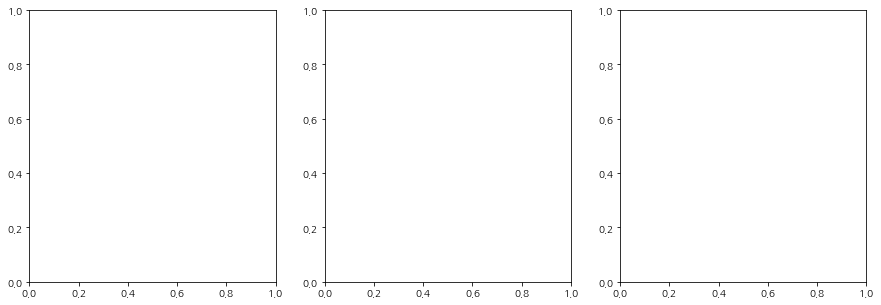

In [106]:
# 틀만들기
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.subplot(132)
plt.subplot(133)
plt.show()

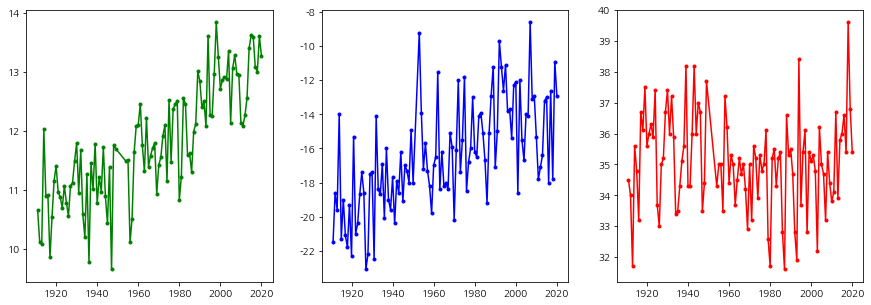

In [107]:
# 그래프 그리기
plt.figure(figsize=(15,5))

# 연평균기온
plt.subplot(131)
plt.plot(df_seoul_mean, 'g.-')


# 연최저기온
plt.subplot(132)
plt.plot(df_seoul_min, 'b.-')

# 연최고기온
plt.subplot(133)
plt.plot(df_seoul_max, 'r.-')

plt.show()

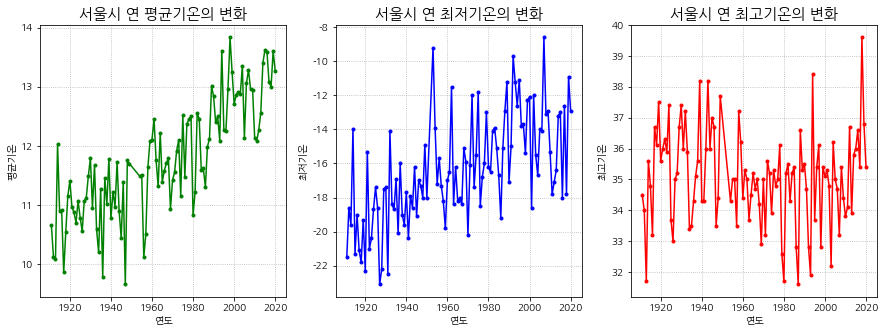

In [111]:
# 제목, 레이블 달기, 그리드 추가
plt.figure(figsize=(15,5))

# 연평균기온
plt.subplot(131)
plt.plot(df_seoul_mean, 'g.-')
plt.title('서울시 연 평균기온의 변화',size=15)
plt.xlabel('연도')
plt.ylabel('평균기온')
plt.grid(ls=':')

# 연최저기온
plt.subplot(132)
plt.plot(df_seoul_min, 'b.-')
plt.title('서울시 연 최저기온의 변화',size=15)
plt.xlabel('연도')
plt.ylabel('최저기온')
plt.grid(ls=':')

# 연최고기온
plt.subplot(133)
plt.plot(df_seoul_max, 'r.-')
plt.title('서울시 연 최고기온의 변화',size=15)
plt.xlabel('연도')
plt.ylabel('최고기온')
plt.grid(ls=':')

plt.show()

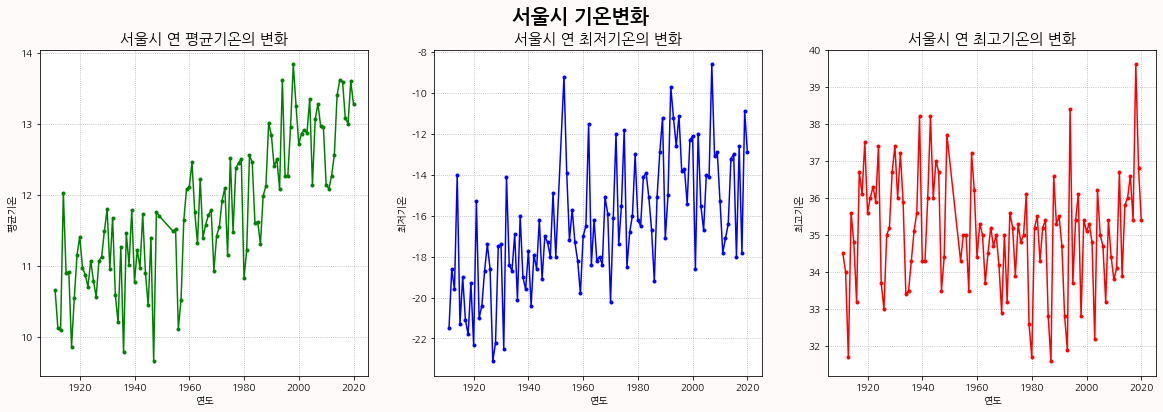

In [167]:
# 큰제목 달고 바탕색, 크기 조정
fig = plt.figure(figsize=(20,6), facecolor='snow')
fig.suptitle('서울시 기온변화', size=20, fontweight='bold')

# 연평균기온
plt.subplot(131)
plt.plot(df_seoul_mean, 'g.-')
plt.title('서울시 연 평균기온의 변화',size=15)
plt.xlabel('연도')
plt.ylabel('평균기온')
plt.grid(ls=':')

# 연최저기온
plt.subplot(132)
plt.plot(df_seoul_min, 'b.-')
plt.title('서울시 연 최저기온의 변화',size=15)
plt.xlabel('연도')
plt.ylabel('최저기온')
plt.grid(ls=':')

# 연최고기온
plt.subplot(133)
plt.plot(df_seoul_max, 'r.-')
plt.title('서울시 연 최고기온의 변화',size=15)
plt.xlabel('연도')
plt.ylabel('최고기온')
plt.grid(ls=':')

plt.show()

### 5.2. 평균, 최저, 최고기온의 변동 폭 비교

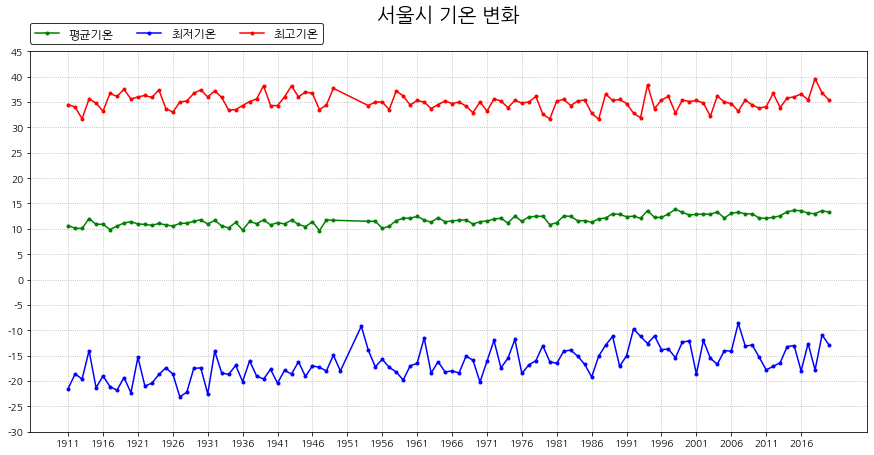

In [149]:
# 세 개의 플롯을 하나의 axes에 그리기
plt.figure(figsize=(15,7))

# 연평균기온
plt.plot(df_seoul_mean, 'g.-', label='평균기온')

# 연최저기온
plt.plot(df_seoul_min, 'b.-', label='최저기온')

# 연최고기온
plt.plot(df_seoul_max, 'r.-', label='최고기온')

# x,y축 레이블
plt.xticks(range(1911,2021,5))
plt.yticks(range(-30,46,5))

# 그리드
plt.grid(ls=':')

# 범레
plt.legend(loc=(0,1.02),ncol=3, fontsize=12, edgecolor='k')

# 그래프 제목
plt.title('서울시 기온 변화', size=20, pad=30)
plt.show()

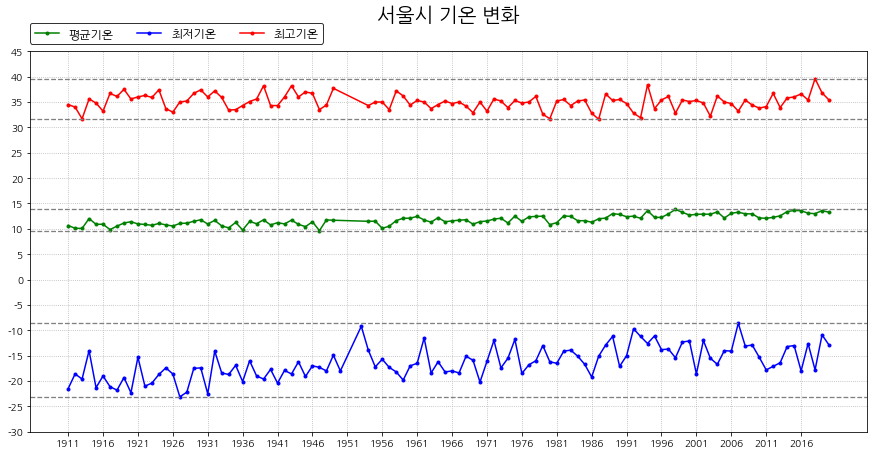

In [166]:
# 각 플롯의 최대, 최소값 위치에 수평선 그리기

plt.figure(figsize=(15,7))

# 연평균기온
plt.plot(df_seoul_mean, 'g.-', label='평균기온')
plt.axhline(df_seoul_mean.min(),color='gray', ls = '--', linewidth=1.3)
plt.axhline(df_seoul_mean.max(),color='gray', ls = '--', linewidth=1.3)

# 연최저기온
plt.plot(df_seoul_min, 'b.-', label='최저기온')
plt.axhline(df_seoul_min.min(),color='gray', ls = '--', linewidth=1.3)
plt.axhline(df_seoul_min.max(),color='gray', ls = '--', linewidth=1.3)

# 연최고기온
plt.plot(df_seoul_max, 'r.-', label='최고기온', ls='-')
plt.axhline(df_seoul_max.min(),color='gray', ls = '--', linewidth=1.3)
plt.axhline(df_seoul_max.max(),color='gray', ls = '--', linewidth=1.3)

plt.xticks(range(1911,2021,5))
plt.yticks(range(-30,46,5))

plt.grid(ls=':')

plt.legend(loc=(0,1.02),ncol=3, fontsize=12, edgecolor='k')

plt.title('서울시 기온 변화', size=20, pad=30)

plt.show()